[ 1 -7 -8  5  6]


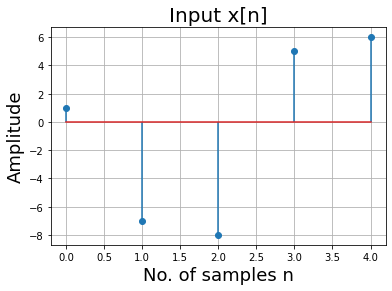

In [1]:
#computing autocorrelation and cross correlation and observing effect of delaying signal
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd 

x = np.array([1, -7, -8, 5, 6])
print(x)
plt.stem(x)
plt.title("Input x[n]", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.grid(True)

[ 0  1 -7 -8  5  6]


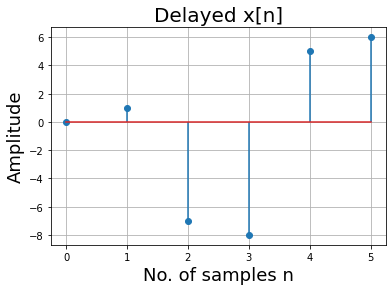

In [2]:
#function to add delay to signal by n points
def delayedsig(x,n) :
    x =np.pad(x,(n,0),'constant')
    return x

#delaying function by 1 
xdelayed = delayedsig(x,1)
print(xdelayed)
plt.stem(xdelayed)
plt.title("Delayed x[n]", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.grid(True)

[  0   2 -14 -16  10  12]


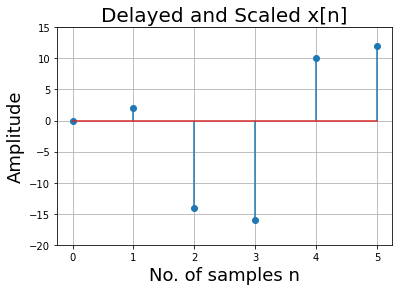

In [3]:
scalingfactor = 2
xdelayscale = scalingfactor*xdelayed
print(xdelayscale)
plt.stem(xdelayscale)
plt.title("Delayed and Scaled x[n]", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.yticks(np.arange(min(xdelayscale)-4, max(xdelayscale)+4, 5.0))
plt.grid(True)

In [4]:
#autocorrelation function
def autocorrelation(x) :
    h = np.zeros(len(x))
    for i in range(0, len(x)) :
        h[len(x)-i-1] = x[i]
    
    N = 2*len(x) - 1
    rxx = np.zeros(N)
    m = N-len(x)
    n = N-len(h)
    #Padding zeros to x and h to make their length to N
    x1 =np.pad(x,(0,m),'constant')
    h1 =np.pad(h,(0,n),'constant')

    for n in range(N) :
        for l in range(N) :
            if(n >= l) :
               rxx[n] = rxx[n] + x1[n-l]*h1[l]
    return rxx

[  6. -37. -91.  39. 175.  39. -91. -37.   6.]


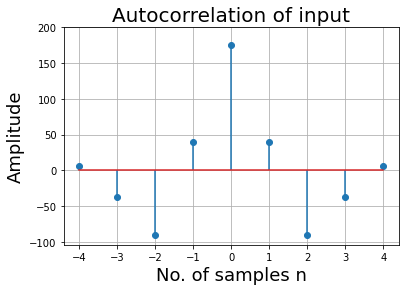

In [5]:
#autocorrelation of input
rxx = autocorrelation(x)
print(rxx)
lenacorr = len(rxx)
n2 = (lenacorr-1)/2
x1 = np.array(range(int(-n2), int(n2)+1))

plt.stem(x1, rxx)
plt.title("Autocorrelation of input", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.yticks(np.arange(-100, max(rxx)+50, 50.0))
plt.grid(True)

[  0.   6. -37. -91.  39. 175.  39. -91. -37.   6.   0.]


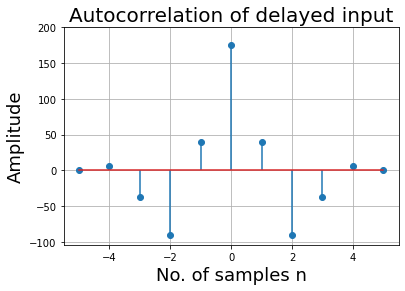

In [6]:
#autocorrelation of delayed input
rxx1 = autocorrelation(xdelayed)
print(rxx1)
lenacorr = len(rxx1)
n2 = (lenacorr-1)/2
x1 = np.array(range(int(-n2), int(n2)+1))

plt.stem(x1, rxx1)
plt.title("Autocorrelation of delayed input", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.yticks(np.arange(-100, max(rxx)+50, 50.0))
plt.grid(True)

In [7]:
def crosscorrelation(x, y) :

    len1 = len(x)
    len2 = len(y)
    if(len1>len2):
        maxSize = len1
        pad1 = maxSize - len2
        y =np.pad(y,(0,pad1),'constant')
        
    else:
        maxSize = len2
        pad2 = maxSize - len1
        x =np.pad(x,(0,pad2),'constant')
        
    h = np.zeros(len(y))
    for i in range(0, len(y)) :
        h[len(y)-i-1] = y[i]
    
    N = 2*maxSize - 1
    cxx = np.zeros(N)
    m = N-len(x)
    n = N-len(h)
    #Padding zeros to x and h to make their length to N
    x1 =np.pad(x,(0,m),'constant')
    h1 =np.pad(h,(0,n),'constant')

    for n in range(N) :
        for l in range(N) :
            if(n >= l) :
                cxx[n] = cxx[n] + x1[n-l]*h1[l]
    return cxx

[  6. -37. -91.  39. 175.  39. -91. -37.   6.   0.   0.]


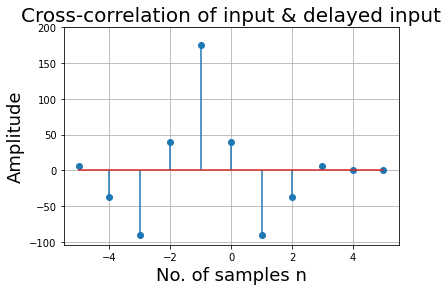

In [8]:
#crosscorrelation of input and delayed input
    
cxx = crosscorrelation(x, xdelayed)
print(cxx)

lenxcorr = len(cxx)
n2 = (lenxcorr-1)/2
x1 = np.array(range(int(-n2), int(n2)+1))

plt.stem(x1, cxx)
plt.title("Cross-correlation of input & delayed input", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.yticks(np.arange(-100, max(cxx)+50, 50.0))
plt.grid(True)

[  12.  -74. -182.   78.  350.   78. -182.  -74.   12.    0.    0.]


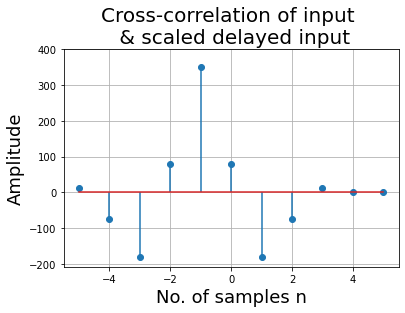

In [13]:
#crosscorrelation of input and scaled delayed input
cxx1  = crosscorrelation(x, xdelayscale)
print(cxx1)

lenxcorr = len(cxx1)
n2 = (lenxcorr-1)/2
x1 = np.array(range(int(-n2), int(n2)+1))

plt.stem(x1, cxx1)
plt.title("Cross-correlation of input \n & scaled delayed input", fontsize= 20)
plt.xlabel('No. of samples n', fontsize= 18)
plt.ylabel('Amplitude', fontsize= 18)
plt.yticks(np.arange(-200, max(cxx1)+100, 100.0))
plt.grid(True)